# ACB Project 
## Identification of transcription factor-binding motifs using convolution neural network
### Sai Krishna Vamshi-2016033 , Tushar Dhyani-MT19221 , Omkar Chandra-PhD 17206

In [8]:
# This Section is commented because it is used to download the data which is done already
"""
import h5py
import numpy as np
fileLoc = 'train.mat'
file = h5py.File(fileLoc)
arrays = {}
for k,v in file.items():
  arrays[k]=np.array(v)
Xcsvtemp = arrays['trainxdata']
Ycsvtemp = arrays['traindata']

Xcsv = []
for i in range(5000):
  Temp1=[]
  for j in range(4):
    Temp2=[]
    for k in range(1000):
      Temp2.append(Xcsvtemp[k][j][i])
    Temp1.append(Temp2)
  Xcsv.append(Temp1)
  
Ycsv = []
for i in range(5000):
  Temp1=[]
  for j in range(919):
    Temp1.append(Ycsvtemp[j][i])
  Ycsv.append(Temp1)

import csv
with open('X_5k.csv','w',newline='') as file:
  w = csv.writer(file,delimiter=',')
  w.writerows(Xcsv)
  
YcsvNumpy = np.array(Ycsv)
np.savetxt('Y_5k.csv',YcsvNumpy,delimiter=',')


"""

"\n\nimport h5py\nimport numpy as np\nfileLoc = 'train.mat'\nfile = h5py.File(fileLoc)\narrays = {}\nfor k,v in file.items():\n  arrays[k]=np.array(v)\nXcsvtemp = arrays['trainxdata']\nYcsvtemp = arrays['traindata']\n\nXcsv = []\nfor i in range(5000):\n  Temp1=[]\n  for j in range(4):\n    Temp2=[]\n    for k in range(1000):\n      Temp2.append(Xcsvtemp[k][j][i])\n    Temp1.append(Temp2)\n  Xcsv.append(Temp1)\n  \nYcsv = []\nfor i in range(5000):\n  Temp1=[]\n  for j in range(919):\n    Temp1.append(Ycsvtemp[j][i])\n  Ycsv.append(Temp1)\n\nimport csv\nwith open('X_5k.csv','w',newline='') as file:\n  w = csv.writer(file,delimiter=',')\n  w.writerows(Xcsv)\n  \nYcsvNumpy = np.array(Ycsv)\nnp.savetxt('Y_5k.csv',YcsvNumpy,delimiter=',')\n\n\n"

XNew are Features and YNew are Labels for our Neural Network.

In [6]:
import pandas as pd
Xtemp = pd.read_csv('X_5k.csv',header=None)

Xtemp is a 3D Matrix stored in 2D format. So making 2D to 3D using below code.

In [7]:
XNew = []
for i in range(5000):
    temp1=[]
    for j in range(4):
        temp2=[]
        for k in range(3000):
            if(k%3==1):
                temp2.append(int(Xtemp.iloc[i][j][k]))
        temp1.append(temp2)
    XNew.append(temp1)

In [9]:
import pandas as pd
YNew = pd.read_csv('Y_5k.csv',header=None)

# Understanding Data

1. Training labels were computed from uniformly processed ENCODE and Roadmap Epigenomics data releases.
2. GRCh37 reference genome  into 200-bp bins. For each bin they computed the label for all 919 chromatin features; a chromatin feature was labeled 1 if more than half of the 200-bp bin is in the peak region and 0 otherwise. 
3. Each training sample consists of a 1,000-bp sequence from the human GRCh37 reference genome centered on each 200-bp bin and is paired with a label vector for 919 chromatin features.



In [11]:
import numpy as np
XNew = np.array(XNew)
YNew = np.array(YNew)

In [12]:
XNew

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 1, 1, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]],

       [[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 1, 0]]])

In [13]:
YNew

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Converting Each 2D Matrix of XNew to Image

In [14]:
# This is Commented because we already converted Matrix to Images
"""

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

for i in range(5000):
  img = Image.fromarray(np.uint8(XNew[i] * 255) , 'L')
  img.save('Im'+str(i)+'.jpg')


"""

"\n\nfrom matplotlib.pyplot import imshow\nimport numpy as np\nfrom PIL import Image\n\nfor i in range(5000):\n  img = Image.fromarray(np.uint8(XNew[i] * 255) , 'L')\n  img.save('Im'+str(i)+'.jpg')\n\n\n"

Making Convolution Neural Network Model 
We have selected chromatins 857,828,6,5 with samples of 1000,3000,5000 for each

In [19]:
from tensorflow import keras
import tensorflow as tf
import keras_preprocessing

cnn_model_gen =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

cnn_model_857_1000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_857_3000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_857_5000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

cnn_model_828_1000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_828_3000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_828_5000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

cnn_model_6_1000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_6_3000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_6_5000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

cnn_model_5_1000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_5_3000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
cnn_model_5_5000S =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4,1000, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
cnn_model_gen.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 999, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 499, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15968)             0         
_________________________________________________________________
dropout (Dropout)            (None, 15968)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8176128   
_________________________________________________________________
dense_1 (Dense)              (None, 14)                7182      
Total params: 8,183,470
Trainable params: 8,183,470
Non-trainable params: 0
______________________________________________

Generating Train , Test Data from Images for CNN Model from Drive

In [21]:
# This Section is commented because it takes Images from Google Drive (done using Google Colab)
"""
import os.path
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_gen_857 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_857/Train',
                                                     class_mode='binary',
                                                     color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(4,1000),)
test_data_gen_857 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_857/Test',
                                                     class_mode='binary',
                                                     color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(4,1000),)
train_data_gen_6 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_6/Train',
                                                     class_mode='binary',
                                                     color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(4,1000),)
test_data_gen_6 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_6/Test',
                                                     class_mode='binary',
                                                     color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(4,1000),)
train_data_gen_5 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_5/Train',
                                                     class_mode='binary',
                                                     color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(4,1000),)
test_data_gen_5 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_5/Test',
                                                     class_mode='binary',
                                                     color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(4,1000),)
"""

"\nimport os.path\nimage_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)\ntrain_data_gen_857 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_857/Train',\n                                                     class_mode='binary',\n                                                     color_mode='grayscale',\n                                                     shuffle=True,\n                                                     target_size=(4,1000),)\ntest_data_gen_857 = image_generator.flow_from_directory(directory='/content/drive/My Drive/deepsea_train/Images_857/Test',\n                                                     class_mode='binary',\n                                                     color_mode='grayscale',\n                                                     shuffle=True,\n                                                     target_size=(4,1000),)\ntrain_data_gen_6 = image_generator.flow_from_directo

In [22]:
cnn_model_857_1000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_857_3000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_857_5000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model_828_1000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_828_3000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_828_5000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model_6_1000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_6_3000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_6_5000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_model_5_1000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_5_3000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model_5_5000S.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
# This Section is commented beacuse it uses files from Google Drive
"""
history_857 = cnn_model_857.fit_generator(train_data_gen_857,validation_data=test_data_gen_857, epochs=10)
history_6 = cnn_model_6.fit_generator(train_data_gen_6,validation_data=test_data_gen_6, epochs=10)
history_5 = cnn_model_5.fit_generator(train_data_gen_5,validation_data=test_data_gen_5, epochs=10)
"""

'\nhistory_857 = cnn_model_857.fit_generator(train_data_gen_857,validation_data=test_data_gen_857, epochs=10)\nhistory_6 = cnn_model_6.fit_generator(train_data_gen_6,validation_data=test_data_gen_6, epochs=10)\nhistory_5 = cnn_model_5.fit_generator(train_data_gen_5,validation_data=test_data_gen_5, epochs=10)\n'

General Model using XNew,YNew

In [24]:
Y857_1000S = np.array([YNew[i][856] for i in range(1000)])
Y857_3000S = np.array([YNew[i][856] for i in range(3000)])
Y857_5000S = np.array([YNew[i][856] for i in range(5000)])

Y828_1000S = np.array([YNew[i][827] for i in range(1000)])
Y828_3000S = np.array([YNew[i][827] for i in range(3000)])
Y828_5000S = np.array([YNew[i][827] for i in range(5000)])

Y6_1000S = np.array([YNew[i][5] for i in range(1000)])
Y6_3000S = np.array([YNew[i][5] for i in range(3000)])
Y6_5000S = np.array([YNew[i][5] for i in range(5000)])

Y5_1000S = np.array([YNew[i][4] for i in range(1000)])
Y5_3000S = np.array([YNew[i][4] for i in range(3000)])
Y5_5000S = np.array([YNew[i][4] for i in range(5000)])

In [25]:
# 857 Transcription Factor
from sklearn.model_selection import train_test_split

X_train_857_1000S, X_test_857_1000S, y_train_857_1000S, y_test_857_1000S = train_test_split(XNew[:1000], Y857_1000S, random_state=1, test_size=0.4)
X_train_857_3000S, X_test_857_3000S, y_train_857_3000S, y_test_857_3000S = train_test_split(XNew[:3000], Y857_3000S, random_state=1, test_size=0.4)
X_train_857_5000S, X_test_857_5000S, y_train_857_5000S, y_test_857_5000S = train_test_split(XNew[:5000], Y857_5000S, random_state=1, test_size=0.4)

cnn_model_857_1000S.fit(X_train_857_1000S.reshape((len(X_train_857_1000S),4,1000,1)),y_train_857_1000S,epochs=10)
print("---------------------------------------- For 1000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_857_1000S = cnn_model_857_1000S.predict_classes(X_test_857_1000S.reshape((len(X_test_857_1000S),4,1000,1)))
print("Predicted",Predicted_857_1000S)
print("Original",y_test_857_1000S)
TP_857_1000S = 0
TN_857_1000S = 0
FP_857_1000S = 0
FN_857_1000S = 0
for i in range(len(y_test_857_1000S)):
    if(y_test_857_1000S[i]==1):
        if(y_test_857_1000S[i]==Predicted_857_1000S[i]):
            TP_857_1000S+=1
        else:
            FN_857_1000S+=1
    else:
        if(y_test_857_1000S[i]==Predicted_857_1000S[i]):
            TN_857_1000S+=1
        else:
            FP_857_1000S+=1
print(TP_857_1000S,TN_857_1000S,FP_857_1000S,FN_857_1000S)

cnn_model_857_3000S.fit(X_train_857_3000S.reshape((len(X_train_857_3000S),4,1000,1)),y_train_857_3000S,epochs=10)
print("---------------------------------------- For 3000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_857_3000S = cnn_model_857_3000S.predict_classes(X_test_857_3000S.reshape((len(X_test_857_3000S),4,1000,1)))
print("Predicted",Predicted_857_3000S)
print("Original",y_test_857_3000S)
TP_857_3000S = 0
TN_857_3000S = 0
FP_857_3000S = 0
FN_857_3000S = 0
for i in range(len(y_test_857_3000S)):
    if(y_test_857_3000S[i]==1):
        if(y_test_857_3000S[i]==Predicted_857_3000S[i]):
            TP_857_3000S+=1
        else:
            FN_857_3000S+=1
    else:
        if(y_test_857_3000S[i]==Predicted_857_3000S[i]):
            TN_857_3000S+=1
        else:
            FP_857_3000S+=1
print(TP_857_3000S,TN_857_3000S,FP_857_3000S,FN_857_3000S)

cnn_model_857_5000S.fit(X_train_857_5000S.reshape((len(X_train_857_5000S),4,1000,1)),y_train_857_5000S,epochs=10)
print("---------------------------------------- For 5000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_857_5000S = cnn_model_857_5000S.predict_classes(X_test_857_5000S.reshape((len(X_test_857_5000S),4,1000,1)))
print("Predicted",Predicted_857_5000S)
print("Original",y_test_857_5000S)
TP_857_5000S = 0
TN_857_5000S = 0
FP_857_5000S = 0
FN_857_5000S = 0
for i in range(len(y_test_857_5000S)):
    if(y_test_857_5000S[i]==1):
        if(y_test_857_5000S[i]==Predicted_857_5000S[i]):
            TP_857_5000S+=1
        else:
            FN_857_5000S+=1
    else:
        if(y_test_857_5000S[i]==Predicted_857_5000S[i]):
            TN_857_5000S+=1
        else:
            FP_857_5000S+=1
print(TP_857_5000S,TN_857_5000S,FP_857_5000S,FN_857_5000S)

Epoch 1/10
600/600 [==============================] - 3s 5ms/sample - loss: 1.5200 - acc: 0.5117
Epoch 2/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.6466 - acc: 0.6133
Epoch 3/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.5683 - acc: 0.7200
Epoch 4/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.5513 - acc: 0.7183
Epoch 5/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.5065 - acc: 0.7300
Epoch 6/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3959 - acc: 0.8333
Epoch 7/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3948 - acc: 0.8333
Epoch 8/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3712 - acc: 0.8333
Epoch 9/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3016 - acc: 0.8800
Epoch 10/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.2420 - acc: 0.9233
-----------------------------

In [26]:
# 828 Transcription Factor
from sklearn.model_selection import train_test_split

X_train_828_1000S, X_test_828_1000S, y_train_828_1000S, y_test_828_1000S = train_test_split(XNew[:1000], Y828_1000S, random_state=1, test_size=0.4)
X_train_828_3000S, X_test_828_3000S, y_train_828_3000S, y_test_828_3000S = train_test_split(XNew[:3000], Y828_3000S, random_state=1, test_size=0.4)
X_train_828_5000S, X_test_828_5000S, y_train_828_5000S, y_test_828_5000S = train_test_split(XNew[:5000], Y828_5000S, random_state=1, test_size=0.4)

cnn_model_828_1000S.fit(X_train_828_1000S.reshape((len(X_train_828_1000S),4,1000,1)),y_train_828_1000S,epochs=10)
print("---------------------------------------- For 1000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_828_1000S = cnn_model_828_1000S.predict_classes(X_test_828_1000S.reshape((len(X_test_828_1000S),4,1000,1)))
print("Predicted",Predicted_828_1000S)
print("Original",y_test_828_1000S)
TP_828_1000S = 0
TN_828_1000S = 0
FP_828_1000S = 0
FN_828_1000S = 0
for i in range(len(y_test_828_1000S)):
    if(y_test_828_1000S[i]==1):
        if(y_test_828_1000S[i]==Predicted_828_1000S[i]):
            TP_828_1000S+=1
        else:
            FN_828_1000S+=1
    else:
        if(y_test_828_1000S[i]==Predicted_828_1000S[i]):
            TN_828_1000S+=1
        else:
            FP_828_1000S+=1
print(TP_828_1000S,TN_828_1000S,FP_828_1000S,FN_828_1000S)

cnn_model_828_3000S.fit(X_train_828_3000S.reshape((len(X_train_828_3000S),4,1000,1)),y_train_828_3000S,epochs=10)
print("---------------------------------------- For 3000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_828_3000S = cnn_model_828_3000S.predict_classes(X_test_828_3000S.reshape((len(X_test_828_3000S),4,1000,1)))
print("Predicted",Predicted_828_3000S)
print("Original",y_test_828_3000S)
TP_828_3000S = 0
TN_828_3000S = 0
FP_828_3000S = 0
FN_828_3000S = 0
for i in range(len(y_test_828_3000S)):
    if(y_test_828_3000S[i]==1):
        if(y_test_828_3000S[i]==Predicted_828_3000S[i]):
            TP_828_3000S+=1
        else:
            FN_828_3000S+=1
    else:
        if(y_test_828_3000S[i]==Predicted_828_3000S[i]):
            TN_828_3000S+=1
        else:
            FP_828_3000S+=1
print(TP_828_3000S,TN_828_3000S,FP_828_3000S,FN_828_3000S)

cnn_model_828_5000S.fit(X_train_828_5000S.reshape((len(X_train_828_5000S),4,1000,1)),y_train_828_5000S,epochs=10)
print("---------------------------------------- For 5000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_828_5000S = cnn_model_828_5000S.predict_classes(X_test_828_5000S.reshape((len(X_test_828_5000S),4,1000,1)))
print("Predicted",Predicted_828_5000S)
print("Original",y_test_828_5000S)
TP_828_5000S = 0
TN_828_5000S = 0
FP_828_5000S = 0
FN_828_5000S = 0
for i in range(len(y_test_828_5000S)):
    if(y_test_828_5000S[i]==1):
        if(y_test_828_5000S[i]==Predicted_828_5000S[i]):
            TP_828_5000S+=1
        else:
            FN_828_5000S+=1
    else:
        if(y_test_828_5000S[i]==Predicted_828_5000S[i]):
            TN_828_5000S+=1
        else:
            FP_828_5000S+=1
print(TP_828_5000S,TN_828_5000S,FP_828_5000S,FN_828_5000S)

Epoch 1/10
600/600 [==============================] - 1s 2ms/sample - loss: 2.1277 - acc: 0.4917
Epoch 2/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.7250 - acc: 0.6467
Epoch 3/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.6657 - acc: 0.6150
Epoch 4/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.5462 - acc: 0.7217
Epoch 5/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.4831 - acc: 0.7733
Epoch 6/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3650 - acc: 0.8683
Epoch 7/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3708 - acc: 0.8500
Epoch 8/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3019 - acc: 0.8983
Epoch 9/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.2479 - acc: 0.9300
Epoch 10/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.2246 - acc: 0.9267
-----------------------------

In [27]:
# 6 Transcription Factor
from sklearn.model_selection import train_test_split

X_train_6_1000S, X_test_6_1000S, y_train_6_1000S, y_test_6_1000S = train_test_split(XNew[:1000], Y6_1000S, random_state=1, test_size=0.4)
X_train_6_3000S, X_test_6_3000S, y_train_6_3000S, y_test_6_3000S = train_test_split(XNew[:3000], Y6_3000S, random_state=1, test_size=0.4)
X_train_6_5000S, X_test_6_5000S, y_train_6_5000S, y_test_6_5000S = train_test_split(XNew[:5000], Y6_5000S, random_state=1, test_size=0.4)

cnn_model_6_1000S.fit(X_train_6_1000S.reshape((len(X_train_6_1000S),4,1000,1)),y_train_6_1000S,epochs=10)
print("---------------------------------------- For 1000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_6_1000S = cnn_model_6_1000S.predict_classes(X_test_6_1000S.reshape((len(X_test_6_1000S),4,1000,1)))
print("Predicted",Predicted_6_1000S)
print("Original",y_test_6_1000S)
TP_6_1000S = 0
TN_6_1000S = 0
FP_6_1000S = 0
FN_6_1000S = 0
for i in range(len(y_test_6_1000S)):
    if(y_test_6_1000S[i]==1):
        if(y_test_6_1000S[i]==Predicted_6_1000S[i]):
            TP_6_1000S+=1
        else:
            FN_6_1000S+=1
    else:
        if(y_test_6_1000S[i]==Predicted_6_1000S[i]):
            TN_6_1000S+=1
        else:
            FP_6_1000S+=1
print(TP_6_1000S,TN_6_1000S,FP_6_1000S,FN_6_1000S)

cnn_model_6_3000S.fit(X_train_6_3000S.reshape((len(X_train_6_3000S),4,1000,1)),y_train_6_3000S,epochs=10)
print("---------------------------------------- For 3000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_6_3000S = cnn_model_6_3000S.predict_classes(X_test_6_3000S.reshape((len(X_test_6_3000S),4,1000,1)))
print("Predicted",Predicted_6_3000S)
print("Original",y_test_6_3000S)
TP_6_3000S = 0
TN_6_3000S = 0
FP_6_3000S = 0
FN_6_3000S = 0
for i in range(len(y_test_6_3000S)):
    if(y_test_6_3000S[i]==1):
        if(y_test_6_3000S[i]==Predicted_6_3000S[i]):
            TP_6_3000S+=1
        else:
            FN_6_3000S+=1
    else:
        if(y_test_6_3000S[i]==Predicted_6_3000S[i]):
            TN_6_3000S+=1
        else:
            FP_6_3000S+=1
print(TP_6_3000S,TN_6_3000S,FP_6_3000S,FN_6_3000S)

cnn_model_6_5000S.fit(X_train_6_5000S.reshape((len(X_train_6_5000S),4,1000,1)),y_train_6_5000S,epochs=10)
print("---------------------------------------- For 5000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_6_5000S = cnn_model_6_5000S.predict_classes(X_test_6_5000S.reshape((len(X_test_6_5000S),4,1000,1)))
print("Predicted",Predicted_6_5000S)
print("Original",y_test_6_5000S)
TP_6_5000S = 0
TN_6_5000S = 0
FP_6_5000S = 0
FN_6_5000S = 0
for i in range(len(y_test_6_5000S)):
    if(y_test_6_5000S[i]==1):
        if(y_test_6_5000S[i]==Predicted_6_5000S[i]):
            TP_6_5000S+=1
        else:
            FN_6_5000S+=1
    else:
        if(y_test_6_5000S[i]==Predicted_6_5000S[i]):
            TN_6_5000S+=1
        else:
            FP_6_5000S+=1
print(TP_6_5000S,TN_6_5000S,FP_6_5000S,FN_6_5000S)

Epoch 1/10
600/600 [==============================] - 1s 2ms/sample - loss: 1.2391 - acc: 0.8533
Epoch 2/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.7717 - acc: 0.9083
Epoch 3/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.2022 - acc: 0.9400
Epoch 4/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.1912 - acc: 0.9400
Epoch 5/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.1436 - acc: 0.9433
Epoch 6/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.1632 - acc: 0.9500
Epoch 7/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.1239 - acc: 0.9533
Epoch 8/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.0726 - acc: 0.9750
Epoch 9/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.0537 - acc: 0.9833
Epoch 10/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.0449 - acc: 0.9900
-----------------------------

In [28]:
# 5 Transcription Factor
from sklearn.model_selection import train_test_split

X_train_5_1000S, X_test_5_1000S, y_train_5_1000S, y_test_5_1000S = train_test_split(XNew[:1000], Y5_1000S, random_state=1, test_size=0.4)
X_train_5_3000S, X_test_5_3000S, y_train_5_3000S, y_test_5_3000S = train_test_split(XNew[:3000], Y5_3000S, random_state=1, test_size=0.4)
X_train_5_5000S, X_test_5_5000S, y_train_5_5000S, y_test_5_5000S = train_test_split(XNew[:5000], Y5_5000S, random_state=1, test_size=0.4)

cnn_model_5_1000S.fit(X_train_5_1000S.reshape((len(X_train_5_1000S),4,1000,1)),y_train_5_1000S,epochs=10)
print("---------------------------------------- For 1000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_5_1000S = cnn_model_5_1000S.predict_classes(X_test_5_1000S.reshape((len(X_test_5_1000S),4,1000,1)))
print("Predicted",Predicted_5_1000S)
print("Original",y_test_5_1000S)
TP_5_1000S = 0
TN_5_1000S = 0
FP_5_1000S = 0
FN_5_1000S = 0
for i in range(len(y_test_5_1000S)):
    if(y_test_5_1000S[i]==1):
        if(y_test_5_1000S[i]==Predicted_5_1000S[i]):
            TP_5_1000S+=1
        else:
            FN_5_1000S+=1
    else:
        if(y_test_5_1000S[i]==Predicted_5_1000S[i]):
            TN_5_1000S+=1
        else:
            FP_5_1000S+=1
print(TP_5_1000S,TN_5_1000S,FP_5_1000S,FN_5_1000S)

cnn_model_5_3000S.fit(X_train_5_3000S.reshape((len(X_train_5_3000S),4,1000,1)),y_train_5_3000S,epochs=10)
print("---------------------------------------- For 3000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_5_3000S = cnn_model_5_3000S.predict_classes(X_test_5_3000S.reshape((len(X_test_5_3000S),4,1000,1)))
print("Predicted",Predicted_5_3000S)
print("Original",y_test_5_3000S)
TP_5_3000S = 0
TN_5_3000S = 0
FP_5_3000S = 0
FN_5_3000S = 0
for i in range(len(y_test_5_3000S)):
    if(y_test_5_3000S[i]==1):
        if(y_test_5_3000S[i]==Predicted_5_3000S[i]):
            TP_5_3000S+=1
        else:
            FN_5_3000S+=1
    else:
        if(y_test_5_3000S[i]==Predicted_5_3000S[i]):
            TN_5_3000S+=1
        else:
            FP_5_3000S+=1
print(TP_5_3000S,TN_5_3000S,FP_5_3000S,FN_5_3000S)

cnn_model_5_5000S.fit(X_train_5_5000S.reshape((len(X_train_5_5000S),4,1000,1)),y_train_5_5000S,epochs=10)
print("---------------------------------------- For 5000 Samples ----------------------------------------")
print("Prediction Now")
Predicted_5_5000S = cnn_model_5_5000S.predict_classes(X_test_5_5000S.reshape((len(X_test_5_5000S),4,1000,1)))
print("Predicted",Predicted_5_5000S)
print("Original",y_test_5_5000S)
TP_5_5000S = 0
TN_5_5000S = 0
FP_5_5000S = 0
FN_5_5000S = 0
for i in range(len(y_test_5_5000S)):
    if(y_test_5_5000S[i]==1):
        if(y_test_5_5000S[i]==Predicted_5_5000S[i]):
            TP_5_5000S+=1
        else:
            FN_5_5000S+=1
    else:
        if(y_test_5_5000S[i]==Predicted_5_5000S[i]):
            TN_5_5000S+=1
        else:
            FP_5_5000S+=1
print(TP_5_5000S,TN_5_5000S,FP_5_5000S,FN_5_5000S)

Epoch 1/10
600/600 [==============================] - 2s 4ms/sample - loss: 1.1657 - acc: 0.7700
Epoch 2/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3618 - acc: 0.8700
Epoch 3/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.3215 - acc: 0.9000
Epoch 4/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.2895 - acc: 0.8983
Epoch 5/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.2355 - acc: 0.9050
Epoch 6/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.1548 - acc: 0.9500
Epoch 7/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.1324 - acc: 0.9600
Epoch 8/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.0971 - acc: 0.9733
Epoch 9/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.0735 - acc: 0.9817
Epoch 10/10
600/600 [==============================] - 1s 2ms/sample - loss: 0.0649 - acc: 0.9850
-----------------------------

In [29]:
# Sensitivity
TPR_857_1000S = TP_857_1000S/(TP_857_1000S+FN_857_1000S)
TPR_857_3000S = TP_857_3000S/(TP_857_3000S+FN_857_3000S)
TPR_857_5000S = TP_857_5000S/(TP_857_5000S+FN_857_5000S)

TPR_828_1000S = TP_828_1000S/(TP_828_1000S+FN_828_1000S)
TPR_828_3000S = TP_828_3000S/(TP_828_3000S+FN_828_3000S)
TPR_828_5000S = TP_828_5000S/(TP_828_5000S+FN_828_5000S)

TPR_6_1000S = TP_6_1000S/(TP_6_1000S+FN_6_1000S)
TPR_6_3000S = TP_6_3000S/(TP_6_3000S+FN_6_3000S)
TPR_6_5000S = TP_6_5000S/(TP_6_5000S+FN_6_5000S)

TPR_5_1000S = TP_5_1000S/(TP_5_1000S+FN_5_1000S)
TPR_5_3000S = TP_5_3000S/(TP_5_3000S+FN_5_3000S)
TPR_5_5000S = TP_5_5000S/(TP_5_5000S+FN_5_5000S)

In [30]:
# FPR = 1 - Specificity
FPR_857_1000S = FP_857_1000S/(FP_857_1000S+TN_857_1000S)
FPR_857_3000S = FP_857_3000S/(FP_857_3000S+TN_857_3000S)
FPR_857_5000S = FP_857_5000S/(FP_857_5000S+TN_857_5000S)

FPR_828_1000S = FP_828_1000S/(FP_828_1000S+TN_828_1000S)
FPR_828_3000S = FP_828_3000S/(FP_828_3000S+TN_828_3000S)
FPR_828_5000S = FP_828_5000S/(FP_828_5000S+TN_828_5000S)

FPR_6_1000S = FP_6_1000S/(FP_6_1000S+TN_6_1000S)
FPR_6_3000S = FP_6_3000S/(FP_6_3000S+TN_6_3000S)
FPR_6_5000S = FP_6_5000S/(FP_6_5000S+TN_6_5000S)

FPR_5_1000S = FP_5_1000S/(FP_5_1000S+TN_5_1000S)
FPR_5_3000S = FP_5_3000S/(FP_5_3000S+TN_5_3000S)
FPR_5_5000S = FP_5_5000S/(FP_5_5000S+TN_5_5000S)

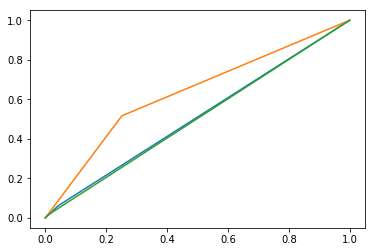

In [32]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_857_1000S, tpr_857_1000S, thresholds_857_1000S = roc_curve(y_test_857_1000S, Predicted_857_1000S)
pyplot.plot(fpr_857_1000S,tpr_857_1000S)
fpr_857_3000S, tpr_857_3000S, thresholds_857_3000S = roc_curve(y_test_857_3000S, Predicted_857_3000S)
pyplot.plot(fpr_857_3000S,tpr_857_3000S)
fpr_857_5000S, tpr_857_5000S, thresholds_857_5000S = roc_curve(y_test_857_5000S, Predicted_857_5000S)
pyplot.plot(fpr_857_5000S,tpr_857_5000S)

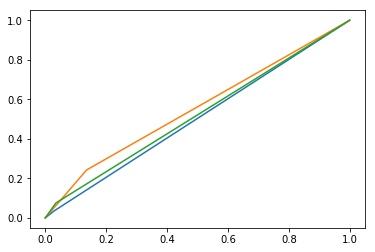

In [33]:
fpr_828_1000S, tpr_828_1000S, thresholds_828_1000S = roc_curve(y_test_828_1000S, Predicted_828_1000S)
pyplot.plot(fpr_828_1000S,tpr_828_1000S)
fpr_828_3000S, tpr_828_3000S, thresholds_828_3000S = roc_curve(y_test_828_3000S, Predicted_828_3000S)
pyplot.plot(fpr_828_3000S,tpr_828_3000S)
fpr_828_5000S, tpr_828_5000S, thresholds_828_5000S = roc_curve(y_test_828_5000S, Predicted_828_5000S)
pyplot.plot(fpr_828_5000S,tpr_828_5000S)

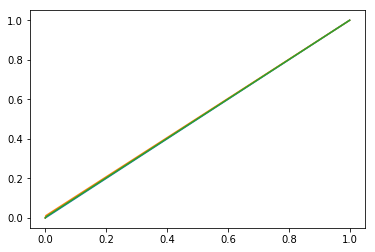

In [34]:
fpr_6_1000S, tpr_6_1000S, thresholds_6_1000S = roc_curve(y_test_6_1000S, Predicted_6_1000S)
pyplot.plot(fpr_6_1000S,tpr_6_1000S)
fpr_6_3000S, tpr_6_3000S, thresholds_6_3000S = roc_curve(y_test_6_3000S, Predicted_6_3000S)
pyplot.plot(fpr_6_3000S,tpr_6_3000S)
fpr_6_5000S, tpr_6_5000S, thresholds_6_5000S = roc_curve(y_test_6_5000S, Predicted_6_5000S)
pyplot.plot(fpr_6_5000S,tpr_6_5000S)

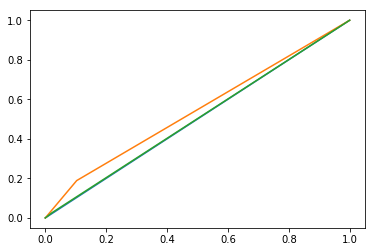

In [35]:
fpr_5_1000S, tpr_5_1000S, thresholds_5_1000S = roc_curve(y_test_5_1000S, Predicted_5_1000S)
pyplot.plot(fpr_5_1000S,tpr_5_1000S)
fpr_5_3000S, tpr_5_3000S, thresholds_5_3000S = roc_curve(y_test_5_3000S, Predicted_5_3000S)
pyplot.plot(fpr_5_3000S,tpr_5_3000S)
fpr_5_5000S, tpr_5_5000S, thresholds_5_5000S = roc_curve(y_test_5_5000S, Predicted_5_5000S)
pyplot.plot(fpr_5_5000S,tpr_5_5000S)